In [8]:
from obspy.clients.fdsn.client import Client
from obspy import UTCDateTime as utc
import seaborn as sns
from Catalog import inspector

In [3]:
client = Client("GFZ")
t1 = utc("2020-01-01T00:00:00")
t2 = utc("2020-01-02T00:00:00")
cat = client.get_events(starttime=t1, endtime=t2, minmagnitude=4.5,
                        includearrivals=True, includeallorigins=False)

In [5]:
insp = inspector(catalog=cat)

In [6]:
insp.df_phases.head(2)

,otime,resource_id,time,time_errors,waveform_id,filter_id,method_id,horizontal_slowness,horizontal_slowness_errors,backazimuth,...,horizontal_slowness_residual,backazimuth_residual,time_weight,horizontal_slowness_weight,backazimuth_weight,earth_model_id,station,network,channel,traveltime
0,2020-01-01T23:12:56.080000Z,smi:org.gfz-potsdam.de/geofon/20200101.231329....,2020-01-01T23:13:29.390000Z,"[uncertainty, lower_uncertainty, upper_uncerta...","[network_code, station_code, channel_code, loc...",None,smi:org.gfz-potsdam.de/geofon/AIC,None,None,None,...,None,None,1.0,None,None,None,NIUE,AU,BHZ,33.31
1,2020-01-01T23:12:56.080000Z,smi:org.gfz-potsdam.de/geofon/20200101.232020....,2020-01-01T23:20:20.240000Z,"[uncertainty, lower_uncertainty, upper_uncerta...","[network_code, station_code, channel_code, loc...",None,smi:org.gfz-potsdam.de/geofon/AIC,None,None,None,...,None,None,1.0,None,None,None,CTAO,IU,BHZ,444.16


<Axes: xlabel='distance', ylabel='time_residual'>

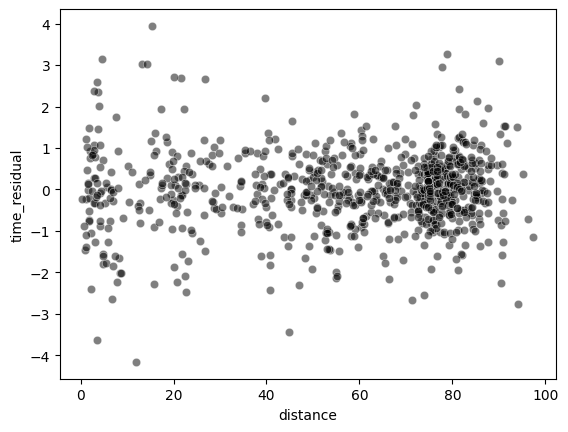

In [9]:
sns.scatterplot(insp.df_phases, x='distance', y='time_residual', alpha=0.5, color='black')

<Axes: xlabel='distance', ylabel='traveltime'>

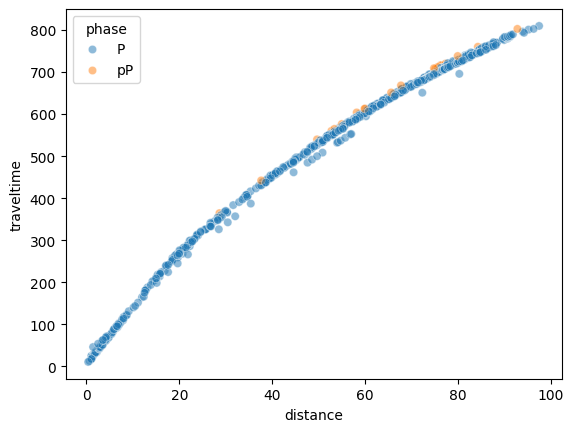

In [10]:
sns.scatterplot(insp.df_phases, x='distance', y='traveltime', alpha=0.5, hue='phase')